In [83]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# globally available variables and their meanings
#                df - all raw CSV data
#          df_train - raw training data (80% of df)
#     df_train_feat - raw training features
#   df_train_labels - raw training labels
#           df_test - raw testing data (20% of df)
# df_train_feat_prepared - prepared training feature data

In [84]:
import zipfile
import io

# Get the data.
# Convert the data to a format you can easily manipulate (without changing the data itself).
# Ensure sensitive information is deleted or protected (e.g., anonymized).
# Data available at https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
def load_data() -> pd.DataFrame:
    with zipfile.ZipFile('./red-wine-quality-cortez-et-al-2009.zip', 'r') as zip_ref:
        csv = zip_ref.read('winequality-red.csv')
        return pd.read_csv(io.BytesIO(csv))

df = load_data()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


| feature | significance |
|:--|:--|
| fixed acidity | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
| volatile acidity | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste |
| citric acid | found in small quantities, citric acid can add 'freshness' and flavor to wines |
| residual sugar | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet |
| chlorides | the amount of salt in the wine |
| free sulfur dioxide | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine |
| density | the density of water is close to that of water depending on the percent alcohol and sugar content |
| pH | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale |
| sulfates | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant |
| alcohol | the percent alcohol content of the wine |
| quality | output variable (based on sensory data, score between 0 and 10) |

In [85]:
# Check the size and type of data (time series, sample, geographical, etc.).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [86]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


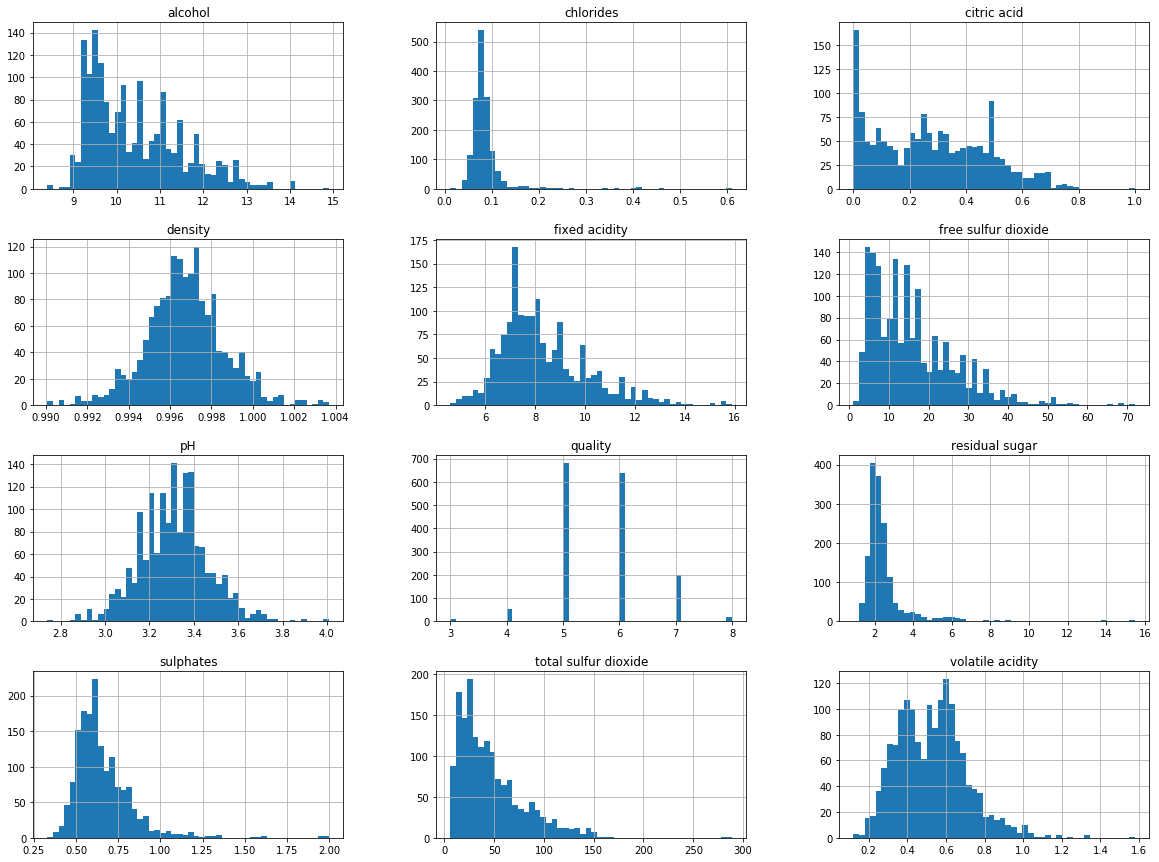

In [87]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [88]:
# Sample a test set, put it aside
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in sss.split(df, df['quality']):
    df_train, df_test = df.iloc[train_index], df.iloc[test_index]

# Check stratification
df_vc = df.quality.value_counts() / len(df)
df_train_vc = df_train.quality.value_counts() / len(df_train)
diff = np.abs(df_vc - df_train_vc)
pd.concat([df_vc, df_train_vc, diff], axis=1, keys=['all', 'training', 'abs diff'])

,all,training,abs diff
5,0.425891,0.426114,2.229697e-04
6,0.398999,0.398749,2.503519e-04
7,0.124453,0.124316,1.369112e-04
4,0.033146,0.032838,3.075613e-04
8,0.011257,0.011728,4.708768e-04
3,0.006254,0.006255,9.779372e-07


In [89]:
# % of missing values
for column in df_train.columns:
    num_na_rows = len(df[pd.isna(df[column])])
    pc_missing = num_na_rows / len(df)
    print('%s %2d%%' %(column, pc_missing))

fixed acidity  0%
volatile acidity  0%
citric acid  0%
residual sugar  0%
chlorides  0%
free sulfur dioxide  0%
total sulfur dioxide  0%
density  0%
pH  0%
sulphates  0%
alcohol  0%
quality  0%


In [90]:
# another way of checking missing values
sample_incomplete_rows = df_train[df_train.isnull().any(axis=1)]
print('Number of incomplete rows: %s' % len(sample_incomplete_rows))

Number of incomplete rows: 0


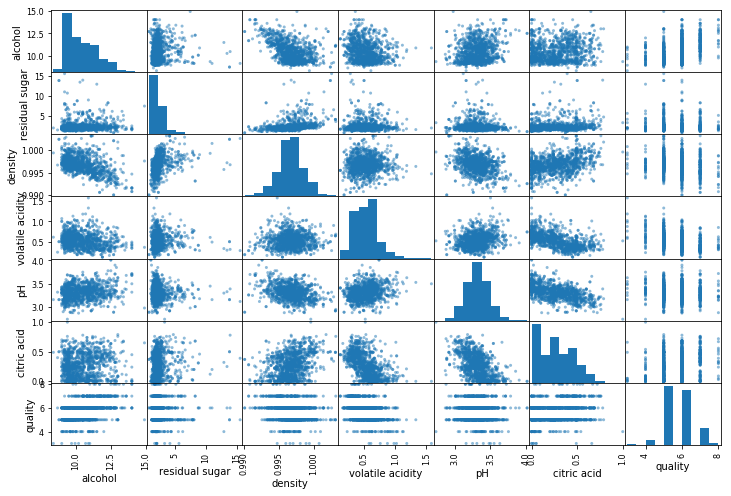

In [91]:
attrs = ['alcohol', 'residual sugar', 'density', 'volatile acidity', 'pH', 'citric acid', 'quality']
pd.plotting.scatter_matrix(df_train[attrs], figsize=(12, 8))
plt.show()

In [92]:
# Study the correlations between attributes.
# It appears alcohol positively correlates with quality, while volatile acidity negatively correlates with quality
df_train.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.490833
sulphates               0.248064
citric acid             0.208906
fixed acidity           0.100067
residual sugar         -0.019291
pH                     -0.039184
free sulfur dioxide    -0.045945
chlorides              -0.131084
total sulfur dioxide   -0.172826
density                -0.209105
volatile acidity       -0.390823
Name: quality, dtype: float64

In [93]:
# prepare data for machine learning algorithms by separating labels from data
df_train_feat = df_train.drop(columns=['quality'])
df_train_labels = df_train['quality'].copy()

df_train_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
979,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
767,7.5,0.60,0.32,2.7,0.103,13.0,98.0,0.99938,3.45,0.62,9.5
809,7.6,0.48,0.31,2.8,0.070,4.0,15.0,0.99693,3.22,0.55,10.3
673,8.2,0.73,0.21,1.7,0.074,5.0,13.0,0.99680,3.20,0.52,9.5
1083,8.7,0.42,0.45,2.4,0.072,32.0,59.0,0.99617,3.33,0.77,12.0


In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

df_train_feat_prepared = pipeline.fit_transform(df_train_feat)
df_train_feat_prepared.shape

(1279, 11)

In [117]:
# quick n' dirty linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_train_feat_prepared, df_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
some_feat = df.drop(columns=['quality']).iloc[:5]
some_labels = df.iloc[:5]['quality']
some_feat_prepared = pipeline.fit_transform(some_feat)
print('Predicted:\t', lin_reg.predict(some_feat_prepared))
print('Actual:\t\t', list(some_labels))

Predicted:	 [5.1306954  5.8346162  5.88336226 6.20671362 5.1306954 ]
Actual:		 [5, 5, 5, 6, 5]


In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_train_predict = lin_reg.predict(df_train_feat_prepared)
lin_mse = mean_squared_error(df_train_labels, df_train_predict)
lin_rmse = np.sqrt(lin_mse)
print('mean squared error', lin_rmse)

lin_mae = mean_absolute_error(df_train_labels, df_train_predict)
print('mean absolute error', lin_mae)
lin_reg

mean squared error 0.6434138608538601
mean absolute error 0.5034484679108614


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
# quick n' dirty decision tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_train_feat_prepared, df_train_labels)
df_train_predict = tree_reg.predict(df_train_feat_prepared)
tree_mse = mean_squared_error(df_train_labels, df_train_predict)
tree_rmse = np.sqrt(tree_mse)
print('mean squared error', tree_rmse)

tree_mae = mean_absolute_error(df_train_labels, df_train_predict)
print('mean absolute error', tree_mae)
tree_reg

mean squared error 0.0
mean absolute error 0.0


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [120]:
# quick n' dirty random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(df_train_feat_prepared, df_train_labels)
df_train_predict = forest_reg.predict(df_train_feat_prepared)
forest_mse = mean_squared_error(y_pred=df_train_predict, y_true=df_train_labels)
forest_rmse = np.sqrt(forest_mse)
print('mean squared error', forest_rmse)

forest_mae = mean_absolute_error(y_pred=df_train_predict, y_true=df_train_labels)
print('mean absolute error', forest_mae)
forest_reg

mean squared error 0.26261748552984876
mean absolute error 0.17240031274433143


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [123]:
# quick n' dirty SVM
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(df_train_feat_prepared, df_train_labels)
df_train_predict = svm_reg.predict(df_train_feat_prepared)
svm_mse = mean_squared_error(y_pred=df_train_predict, y_true=df_train_labels)
svm_rmse = np.sqrt(svm_mse)
print('mean squared error', svm_rmse)

svm_mae = mean_absolute_error(df_train_labels, df_train_predict)
print('mean absolute error', svm_mae)
svm_reg

mean squared error 0.649650889081691
mean absolute error 0.49578245439368457


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [108]:
def display_scores(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Standard Deviation', scores.std())

In [109]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, df_train_feat_prepared, df_train_labels,
                        scoring='neg_mean_squared_error', cv=10, n_jobs=4)
lin_rmse_scores = np.sqrt(-lin_reg_scores)

display_scores(lin_rmse_scores)

Scores [0.59528875 0.615607   0.71884325 0.64681159 0.65534996 0.66115575
 0.62717037 0.62130952 0.67802577 0.68843812]
Mean 0.6508000090339277
Standard Deviation 0.035608564779938075


In [110]:
tree_reg_scores = cross_val_score(tree_reg, df_train_feat_prepared, df_train_labels,
                                  scoring='neg_mean_squared_error', cv=10, n_jobs=4)
tree_rmse_scores = np.sqrt(-tree_reg_scores)

display_scores(tree_rmse_scores)

Scores [0.8882919  0.8149003  0.91429618 0.80525617 0.78561282 0.89704376
 0.8431711  0.70156076 0.81967982 0.78369205]
Mean 0.8253504845406241
Standard Deviation 0.0604268194033303


In [127]:
forest_reg_scores = cross_val_score(forest_reg, df_train_feat_prepared, df_train_labels,
                                  scoring='neg_mean_squared_error', cv=10, n_jobs=4)
forest_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_reg_scores)
# Question: Why are the scores / mean negative?

Scores [-0.33742188 -0.389375   -0.4675     -0.28789063 -0.36953125 -0.41617187
 -0.34210937 -0.33851562 -0.4290625  -0.41393701]
Mean -0.3791515132874016
Standard Deviation 0.05115415577320387


In [125]:
svm_reg_scores = cross_val_score(svm_reg, df_train_feat_prepared, df_train_labels,
                                 scoring='neg_mean_squared_error', cv=10, n_jobs=4)
svm_rmse_scores = np.sqrt(-svm_reg_scores)
display_scores(svm_rmse_scores)

Scores [0.6096715  0.61458901 0.71608018 0.6557755  0.66040467 0.66387741
 0.63455243 0.62865672 0.67529079 0.69376423]
Mean 0.655266242060753
Standard Deviation 0.032485187686936284


In [136]:
# It looks like the most promising models are Linear Regression & SVM
# Let do grid search cross validation with SVM to find best hyperparameter combination
from sklearn.model_selection import GridSearchCV

svm_param_grid = [
    {
        'C': [1., 3., 10., 30., 100., 300., 1000., 3000.], 
        'kernel': ['linear']
    },
    {
        'C': [1., 3., 10., 30., 100., 300., 1000., 3000.], 
        'kernel': ['poly', 'rbf', 'sigmoid'], 
        'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
    }
]

svm_reg = SVR()
svm_grid_search = GridSearchCV(svm_reg, svm_param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, verbose=2)
svm_grid_search.fit(df_train_feat_prepared, df_train_labels)

Fitting 5 folds for each of 152 candidates, totalling 760 fits
[CV] C=1.0, kernel=linear ............................................
[CV] C=1.0, kernel=linear ............................................
[CV] C=1.0, kernel=linear ............................................
[CV] C=1.0, kernel=linear ............................................
[CV] ............................. C=1.0, kernel=linear, total=   0.1s
[CV] C=1.0, kernel=linear ............................................
[CV] ............................. C=1.0, kernel=linear, total=   0.1s
[CV] C=3.0, kernel=linear ............................................
[CV] ............................. C=1.0, kernel=linear, total=   0.1s
[CV] C=3.0, kernel=linear ............................................
[CV] ............................. C=1.0, kernel=linear, total=   0.2s
[CV] C=3.0, kernel=linear ............................................
[CV] ............................. C=1.0, kernel=linear, total=   0.2s
[CV] C=3.0, ke

KeyboardInterrupt: 